In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# numpy.polynomial.legendre.Legendre.basis
# numpy.polynomial.legendre.leggauss 
polynomial.legendre.Legendre.basis?

Object `polynomial.legendre.Legendre.basis` not found.


In [10]:
from numpy import polynomial
from numpy.polynomial import  legendre
from numpy.polynomial.legendre import *

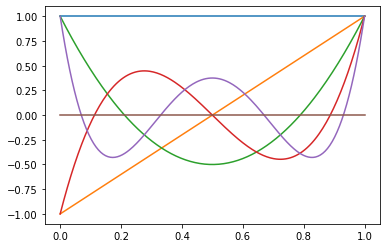

In [19]:
n = 5
V = [Legendre.basis(i, (0,1)) for i in range(n)]

x = linspace(0,1,256)
_ = [plot(x,V[i](x)) for i in range(n)]
_ = plot(x, 0*x)

In [27]:
def exact(d, interval=(0,1)):
    """
    exact integral of x**d between interval[0] and interval[1]
    """
    return (interval[1]**(d+1)-interval[0]**(d+1))/(d+1)

def gauss(d, interval=(0,1)):
    q, w = leggauss(d)
    q = (q+1)/2*(interval[1]-interval[0])+interval[0]
    w = w/2*(interval[1]-interval[0])
    return q, w
    

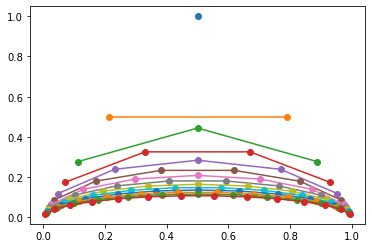

In [32]:
for i in range(1,15):
    q, w = gauss(i)
    _ = plot(q,w,'o-')

In [37]:
def check_error(deg, n):
    """
    integrate x**deg in [0,1] with gauss of order n-1 (n gauss points)
    """
    q, w = gauss(n)
    #     integral = 0
    #     for i in range(n):
    #         integral = integral + (q[i]**deg)*w[i]
    # return w.dot(q**deg)
    # return sum(w * (q**deg))
    int_n = einsum('i,i', q**deg, w)
    return int_n - exact(deg)

In [44]:
n_degrees = 7
n_points  = 4

E = array([[check_error(d, n) for n in range(1,n_points)]for d in range(n_degrees)])


In [45]:
E

array([[ 0.00000000e+00,  0.00000000e+00,  2.22044605e-16],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-8.33333333e-02,  5.55111512e-17,  1.11022302e-16],
       [-1.25000000e-01, -2.77555756e-17,  5.55111512e-17],
       [-1.37500000e-01, -5.55555556e-03,  5.55111512e-17],
       [-1.35416667e-01, -1.38888889e-02,  5.55111512e-17],
       [-1.27232143e-01, -2.24867725e-02, -3.57142857e-04]])

In [52]:
def check_error(fun, exact, n, interval=(0,1)):
    """
    check the error between integral(fun, interval) and exact with n quadrature points
    """
    q,w = gauss(n, interval)
    return abs(fun(q).dot(w)-exact)

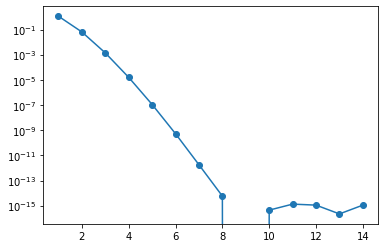

In [53]:
interval = (0,pi)

points = list(range(1,15))
errors = [check_error(sin, 2, p, interval) for p in points]

semilogy(points, errors, 'o-')